In [1]:
from gensim import corpora
import gensim
from gensim.models.doc2vec import TaggedDocument
import nltk
from nltk.corpus import stopwords
import csv
import numpy as np
import string
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [2]:
def get_documents(r):
    i = 0
    for d in r:
        dt = get_words(d)
        doc = TaggedDocument([w for w in dt if w not in stopwords.words('english')], [i])
        i += 1
        yield doc
            
def get_words(r):
    r = re.sub('[^a-zA-Z ]', '', r.lower())
    words = nltk.word_tokenize(r)
    return [w for w in words if w not in stopwords.words('english')]

with open('../resumes/processed_resumes_work.csv') as f:
    r = csv.reader(f)
    i = 0
    jobs = []
    titles = []
    docs = []
    for row in r:
        jobs.append(row[7])
        titles.append(row[3])
        i += 1
        if i >= 5000:
            break

sents_gen = get_documents(jobs)
for s in sents_gen:
    docs.append(s)
    
titles = np.array(titles)

In [3]:
doc2vecModel =gensim.models.Doc2Vec(docs, size=20, iter=100)
vects = doc2vecModel.docvecs.doctag_syn0

/home/kbrodd/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/home/kbrodd/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/home/kbrodd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  


In [4]:
# reduce dimention for plotting
pca = PCA(n_components = 2)
pca.fit(vects)
reduced= pca.transform(vects)

In [22]:
# k-means cluster
num_cluster = 50
m = KMeans(n_clusters=num_cluster, random_state=0).fit(vects)
p = m.predict(vects)

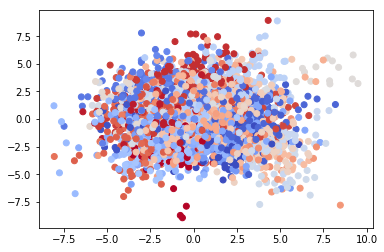

In [23]:
x, y =  zip(*reduced)
plt.scatter(x,y,c=p, cmap='coolwarm')
plt.show()

In [24]:
npjobs = np.array(jobs)
for i in range(num_cluster):
    print('-'*100)
    wordcounts = {}
    cluster_jobs = npjobs[np.where(p == i)]
    print(np.random.choice(titles[np.where(p == i)], 5, replace=False))
    for j in cluster_jobs:
        words = get_words(j)
        for w in words:
            if w not in wordcounts:
                wordcounts[w] = 0
            wordcounts[w] += 1
    wctuples = wordcounts.items()
    revtuples = [(b, a) for a, b in wctuples]
    print([s for c, s in sorted(revtuples, reverse=True)][:10])

----------------------------------------------------------------------------------------------------
['Network Operations Center Analyst'
 'Senior Network Engineer, Major Accounts (Florida)'
 'Voice Engineer/Implementations' 'Network Engineer'
 'Systems Administrator, Senior Network Engineer (Technisource/Contractor)']
['network', 'cisco', 'support', 'issues', 'configured', 'hardware', 'troubleshooting', 'systems', 'software', 'maintained']
----------------------------------------------------------------------------------------------------
['General Manager' 'DIRECTOR ASSISTANT' 'HRIS Payroll Coordinator'
 'Office Administrator' 'Recruiter-Lead']
['payroll', 'new', 'reports', 'accounts', 'employee', 'employees', 'including', 'financial', 'tax', 'process']
----------------------------------------------------------------------------------------------------
['Salesforce Developer / Administrator'
 'Senior Southeast Regional Sales Engineer' 'Business Analyst'
 'Software Engineer' 'SOFTWARE

['using', 'server', 'servers', 'linux', 'aws', 'experience', 'application', 'configuration', 'weblogic', 'configured']
----------------------------------------------------------------------------------------------------
['Customer Service Representative / Driver' 'Operations Manager'
 'Sales Associate/Department Manager/Operations Manager'
 'Shipping Supervisor' 'Customized Account Rep']
['store', 'customer', 'sales', 'training', 'team', 'service', 'employees', 'performance', 'staff', 'ensure']
----------------------------------------------------------------------------------------------------
['Sales Consultant' 'MARKETING CONSULTANT' 'Consultant' 'Project Manager'
 'Technical Account Manager']
['sales', 'customer', 'business', 'new', 'clients', 'revenue', 'client', 'services', 'team', 'responsible']
----------------------------------------------------------------------------------------------------
['Managing Consultant' 'Programmer Analyst III. Technical Lead'
 'Solution Lead- Order

['marketing', 'managed', 'developed', 'events', 'created', 'media', 'including', 'content', 'management', 'social']
----------------------------------------------------------------------------------------------------
['Technical developer and functional business analyst'
 'Business Intelligence SQL Developer' 'Data Warehouse/BI Developer'
 'Hadoop/Big Data Developer' 'Sr. MicroStrategy Developer']
['data', 'using', 'reports', 'business', 'created', 'sql', 'performance', 'database', 'used', 'design']
----------------------------------------------------------------------------------------------------
['Chief Clerk & Staff Attorney' 'Financial Reporting Manager'
 'Office Administrator' 'Learning Technology Manager'
 'Administrative assistant']
['managed', 'maintained', 'assisted', 'company', 'management', 'prepared', 'new', 'including', 'developed', 'employee']
----------------------------------------------------------------------------------------------------
['Director, Corporate Strate

In [25]:
# gaussian cluster
gm = GaussianMixture(n_components=num_cluster, random_state=0).fit(vects)
pm = gm.predict(vects)

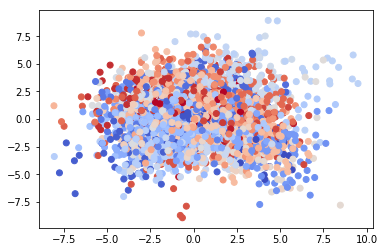

In [26]:
plt.scatter(x,y,c=pm, cmap='coolwarm')
plt.show()

In [27]:
for i in range(num_cluster):
    print('-'*100)
    wordcounts = {}
    cluster_jobs = npjobs[np.where(pm == i)]
    print(np.random.choice(titles[np.where(pm == i)], 5, replace=False))
    for j in cluster_jobs:
        words = get_words(j)
        for w in words:
            if w not in wordcounts:
                wordcounts[w] = 0
            wordcounts[w] += 1
    wctuples = wordcounts.items()
    revtuples = [(b, a) for a, b in wctuples]
    print([s for c, s in sorted(revtuples, reverse=True)][:10])

----------------------------------------------------------------------------------------------------
['Senior Software Quality Assurance Engineer'
 'Quality Assurance Team Lead'
 'Sr. Quality Assurance Analyst (Consultant)'
 'Quality Assurance Tester/ Analyst' 'Software Engineer']
['test', 'testing', 'team', 'project', 'system', 'software', 'requirements', 'using', 'teams', 'management']
----------------------------------------------------------------------------------------------------
['Service Engineer' 'Wait Staff' 'Assistant Front End Manager'
 'Associate news editor/writer/managing editor'
 'Fleet and Logistics Coordinator']
['customer', 'service', 'sales', 'ampamp', 'customers', 'responsible', 'store', 'services', 'management', 'client']
----------------------------------------------------------------------------------------------------
['Client Services Administrator' 'SOCIAL SERVICES INTERN'
 'Client Services Administrator'
 'Client Relations Supervisor/Office Manager' '']
['c

['management', 'project', 'business', 'support', 'development', 'infrastructure', 'projects', 'managed', 'new', 'team']
----------------------------------------------------------------------------------------------------
['Vice President of Sales'
 'co-Principal Investigator, Product Manager, Research Scientist, College of Engineering'
 'Sr. Art Director (Contract)' 'Marketing Assistant'
 'Director of Employee Engagement, Office of Social Responsibility']
['marketing', 'sales', 'media', 'developed', 'events', 'social', 'managed', 'ampamp', 'including', 'new']
----------------------------------------------------------------------------------------------------
['Material Handler' 'Supervisor'
 'Hostess/Food Runner/ Food Truck Operator' 'Financial Analyst'
 'Human Resources Manager']
['store', 'team', 'sales', 'customer', 'training', 'management', 'daily', 'company', 'service', 'employees']
---------------------------------------------------------------------------------------------------

ValueError: Cannot take a larger sample than population when 'replace=False'